<a href="https://colab.research.google.com/github/mou135/CBTCIP/blob/main/Spam_Email_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Spam Email Detection

1.Import necessary Libraries

2.Exploratory Data Analysis

3.Data preprocessing

4.Model Training

5.Model evaluation(confusion matrix) and accuracy check

6.Model Testing with new data points

7.Model Deployment

In [188]:
 #Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [189]:
# #importing the dataset
URL = ("https://docs.google.com/spreadsheets/d/1_-QE2jc8QgH4XO-WYnQD49Kvg9HrZCInsi_tPVqBTjI/edit?gid=560893565#gid=560893565")
path = ("/content/drive/MyDrive/Spam Email Detection.xlsx") +URL.split('/')[-2]

In [190]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Correct file path
path = '/content/drive/MyDrive/Spam Email Detection.xlsx'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [191]:
#Load the dataset
path = '/content/drive/MyDrive/Spam Email Detection.xlsx'
# Load the dataset into a DataFrame
df = pd.read_excel(path)




In [192]:
# Verify the first few rows of the DataFrame
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [193]:
# Verify the last few rows of the DataFrame
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the �750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [194]:
df.shape

(5572, 5)

In [195]:
df.duplicated(keep="first").sum() #Checking the duplicates

409

In [196]:
df.drop_duplicates (inplace=True) #Identifing the duplicates for dropping

df.shape #Checking the shape after dropping

(5163, 5)

In [197]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [198]:
#Removing the unwanted columns
df.columns = ['type','message','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
unwanted_columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df = df.drop(columns=unwanted_columns)
print(df.head())





   type  \
0   ham   
1   ham   
2  spam   
3   ham   
4   ham   

                                                                                                                                                       message  
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  
1                                                                                                                                Ok lar... Joking wif u oni...  
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's  
3                                                                                                            U dun say so early hor... U c already then say...  
4                                                                                                Nah I don't think he goes to us

In [199]:
print(df.tail())

      type  \
5567  spam   
5568   ham   
5569   ham   
5570   ham   
5571   ham   

                                                                                                                                                               message  
5567  This is the 2nd time we have tried 2 contact u. U have won the �750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.  
5568                                                                                                                             Will �_ b going to esplanade fr home?  
5569                                                                                                         Pity, * was in mood for that. So...any other suggestions?  
5570                                     The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free  
5571                                                                  

In [200]:
# Check the structure of the DataFrame
print(df.info())



<class 'pandas.core.frame.DataFrame'>
Index: 5163 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   type     5163 non-null   object
 1   message  5163 non-null   object
dtypes: object(2)
memory usage: 121.0+ KB
None


In [201]:
#Checking any null values are present in dataset or not
df.isna(). sum ()

type       0
message    0
dtype: int64

In [202]:
print(df.describe())



        type  \
count   5163   
unique     2   
top      ham   
freq    4516   

                                                                                                                message  
count                                                                                                              5163  
unique                                                                                                             5163  
top     Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  
freq                                                                                                                  1  


In [203]:
df ['spam'] = df['type'].apply(lambda x:1 if x=='spam' else 0) # adding a new column
df.head()

,type,message,spam
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives around here though",0


#EDA

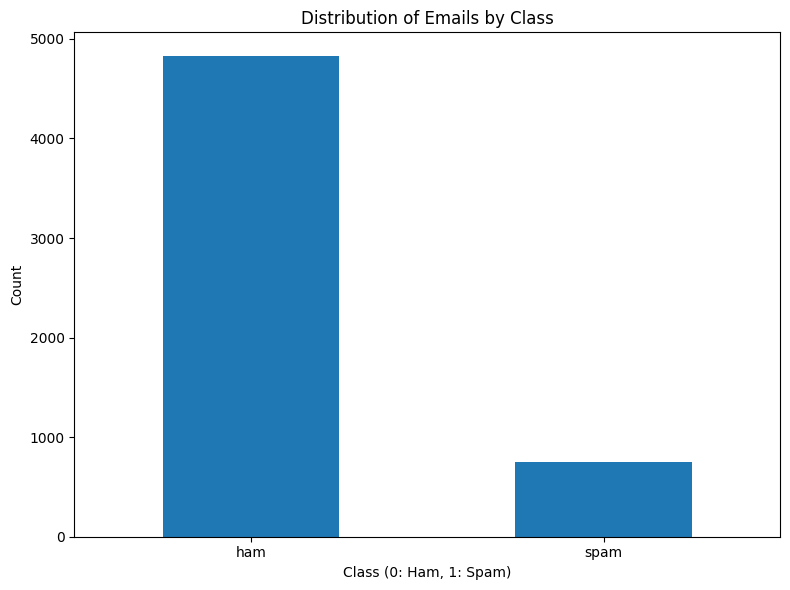

In [204]:
import matplotlib.pyplot as plt

# Count of each class (assuming 'Class' is the column indicating spam or non-spam)
class_counts = emails['v1'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', rot=0)
plt.title('Distribution of Emails by Class')
plt.xlabel('Class (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.tight_layout() #plot the graph efficiently
plt.show()


#Data preprocessing

In [205]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(df.message, df.spam, test_size=0.25, random_state=42)


In [206]:
X_train = df['message']
Y_train = df['spam']
X_test = df['message']
Y_test = df['spam']
print(df.head())

   type  \
0   ham   
1   ham   
2  spam   
3   ham   
4   ham   

                                                                                                                                                       message  \
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...   
1                                                                                                                                Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
3                                                                                                            U dun say so early hor... U c already then say...   
4                                                                                                Nah I don't think he goes 

In [207]:
#covert data type
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [208]:
# Ensure all entries in X_train and X_test are strings
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# Verify the conversion
print(X_test[:5])  # Print first few samples of X_test to verify they are strings

0                                                Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1                                                                                                                                  Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3                                                                                                              U dun say so early hor... U c already then say...
4                                                                                                  Nah I don't think he goes to usf, he lives around here though
Name: message, dtype: object


#Model Training

In [209]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'message' and 'spam' columns
X_train, X_test, Y_train, Y_test = train_test_split(df['message'], df['spam'], test_size=0.25, random_state=42)

# Ensure all entries in X_train and X_test are strings
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# Ensure Y_train and Y_test are integer type
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

# Create a pipeline for text classification
pipeline = Pipeline([
    ('vect', CountVectorizer()),    # Convert text to word count vectors
    ('tfidf', TfidfTransformer()),  # Apply TF-IDF transformation
    ('clf', MultinomialNB()),       # Use Naive Bayes classifier
])

# Fit the pipeline on training data
pipeline.fit(X_train, Y_train)





Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [210]:
# Predictions on test data
predictions = pipeline.predict(X_test)

#Generate confusion matrix

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1147
           1       1.00      0.62      0.77       144

    accuracy                           0.96      1291
   macro avg       0.98      0.81      0.87      1291
weighted avg       0.96      0.96      0.95      1291



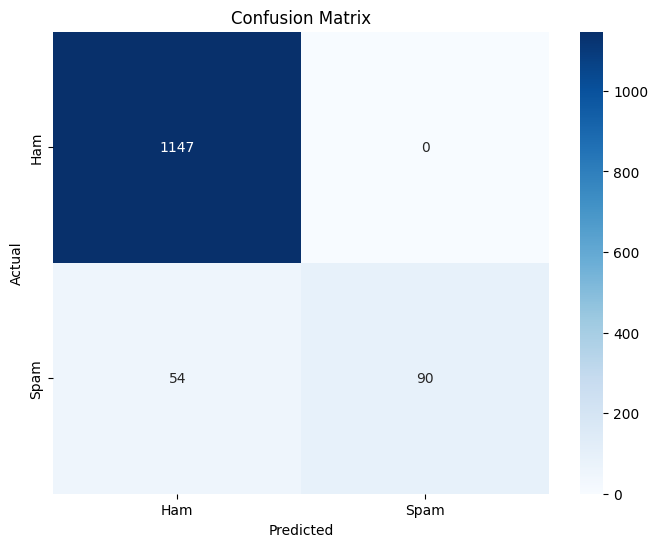

In [211]:
# Evaluate performance
accuracy = accuracy_score(Y_test, predictions)
report = classification_report(Y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [212]:
# A detailed classification report
from sklearn.metrics import classification_report

# Generate classification report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1147
           1       1.00      0.62      0.77       144

    accuracy                           0.96      1291
   macro avg       0.98      0.81      0.87      1291
weighted avg       0.96      0.96      0.95      1291



#Model Testing

In [213]:
# Example list of new email messages
new_emails = [
    "Congratulations! You've won a $1,000 myntra gift card. Click here to claim now.",
    "Hi member, ciphyerByte technologies scheduled a meeting for tomorrow at 10 AM.",
    "Your account has been compromised. Please update your password immediately.",
    "Reminder: Your netflix subscription is about to expire. Renew now to continue enjoying our services."

]

# Make predictions on new emails
predictions = pipeline.predict(new_emails)

# Print the predictions
for email, prediction in zip(new_emails, predictions):
    print(f"Email: {email}")
    print(f"Prediction: {'Spam' if prediction == 1 else 'Ham'}\n")


Email: Congratulations! You've won a $1,000 myntra gift card. Click here to claim now.
Prediction: Spam

Email: Hi member, ciphyerByte technologies scheduled a meeting for tomorrow at 10 AM.
Prediction: Ham

Email: Your account has been compromised. Please update your password immediately.
Prediction: Ham

Email: Reminder: Your netflix subscription is about to expire. Renew now to continue enjoying our services.
Prediction: Ham



#Cross validation

In [214]:
#Use cross-validation to ensure that your model performs well on different subsets of the data and to avoid overfitting

from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(pipeline, df['message'].astype(str), df['spam'].astype(int), cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-validation accuracy: 0.95 ± 0.01


#Save the model

In [215]:
import joblib

# Save the pipeline to a file
joblib.dump(pipeline, 'spam_email_classifier.pkl')

# Load the pipeline from a file (for future use)
# pipeline = joblib.load('spam_email_classifier.pkl')

['spam_email_classifier.pkl']